# Exploring clusters in the latent space

In [31]:
import torch
from sklearn.cluster import KMeans
import numpy as np
import os
import pickle
from os.path import join
#from utils import *
#from torch.autograd import Variable
import matplotlib.pyplot as plt

base_path = '/media/songbird/Data/mdgan_output/'
#base_path = '../mdgan_output/'

runs = os.listdir(base_path)
run = '13-56-24' 

for i in range(len(runs)):
    if run in runs[i]:
        base_path = os.path.join(base_path, runs[i])
        break

data_path = os.path.join(base_path,'sequences')
data_path = '/home/songbird/jit_syllable_songbird/svenni/model_13-56-24_seq/'


def load_z(path,max_num=None):
    z_vecs=[]
    for f in os.listdir(path):
        if max_num:
            if len(z_vecs)>=max_num:
                break
        s = np.load(os.path.join(path,f))
        _ = [z_vecs.append(k) for k in s if not np.sum(np.abs(k))==0]
    return np.array(z_vecs)


def inverse_transform(im):
    random_phase = im.copy()
    np.random.shuffle(random_phase)
    p = phase_restore((np.exp(im) - 1), random_phase, 256, N=50)
    return (np.exp(im) - 1) * p

def transform(im):
    im = from_polar(im)
    im,phase = lc.magphase(im)
    im = np.log1p(im)
    return im


In [3]:
base_path

'/media/songbird/Data1/mdgan_output/2017-11-06 18-56-43.995952'

### 1. What is a good number of clusters?
##### Look at reconstruction error

In [32]:
X = load_z(data_path)
N = 10000
X = X[:N]
k_values = np.arange(1,500,5)
distances = []
for k in k_values:
    X_t = KMeans(n_clusters=k, random_state=0).fit_transform(X)
    mean_dist = np.mean([i.min() for i in X_t])
    distances.append(mean_dist)
    print("K: ",k," --- ", end='')
    

IsADirectoryError: [Errno 21] Is a directory: '/home/songbird/jit_syllable_songbird/svenni/model_13-56-24_seq/day19_b3g20'

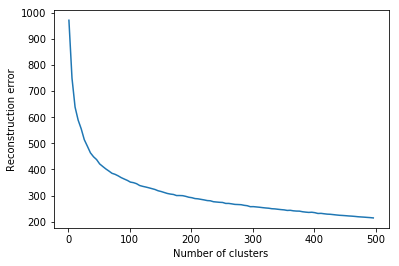

In [13]:
plt.figure()
plt.plot(k_values,distances)
plt.ylabel("Error")
plt.xlabel("Number of clusters")
plt.savefig(os.path.join(base_path,'Kmeans_losscurve.png'))
plt.show()



### 2. Train a Kmeans classifier

In [35]:
seq_folders = [i for i in os.listdir(data_path)]
data = np.concatenate([load_z(join(data_path,i),max_num=10000) for i in seq_folders if not print(seq_folders.index(i))])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(2967801, 128)

In [39]:
np.random.shuffle(data)

In [40]:
#Z = load_z(data_path)
Z = data
N = 1000000
K = 100
Z = Z[:N]
clf = KMeans(n_clusters=K, random_state=0,n_jobs=4)
clf.fit(Z)
with open(os.path.join(base_path,'kmeans.pkl'), 'wb') as f:
    pickle.dump(clf, f)

### 3. Transform each day of sequences into sequences of ints with the kmeans classifier

In [44]:
out_path=data_path[:-1]+'_as_ints/'

In [ ]:
out_path = join(base_path,'sequences_as_ints')

In [45]:
os.makedirs(out_path,exist_ok=True)
seq_folders = [i for i in os.listdir(data_path)]

for ix,folder in enumerate(seq_folders):
    print("folder %d/%d"%(ix,len(seq_folders)))
    with open(join(out_path,'%s_seq.txt'%(folder)),'w') as outfile:
        for f in os.listdir(join(data_path,folder)):
            seq = np.load(join(data_path,folder,f))
            seq = np.array([i for i in seq if not np.sum(np.abs(i))==0])
            seq_int = clf.predict(seq)
            for i in seq_int:
                outfile.write(str(i)+',')
            outfile.write('\n')

folder 0/309
folder 1/309
folder 2/309
folder 3/309
folder 4/309
folder 5/309
folder 6/309
folder 7/309
folder 8/309
folder 9/309
folder 10/309
folder 11/309
folder 12/309
folder 13/309
folder 14/309
folder 15/309
folder 16/309
folder 17/309
folder 18/309
folder 19/309
folder 20/309
folder 21/309
folder 22/309
folder 23/309
folder 24/309
folder 25/309
folder 26/309
folder 27/309
folder 28/309
folder 29/309
folder 30/309
folder 31/309
folder 32/309
folder 33/309
folder 34/309
folder 35/309
folder 36/309
folder 37/309
folder 38/309
folder 39/309
folder 40/309
folder 41/309
folder 42/309
folder 43/309
folder 44/309
folder 45/309
folder 46/309
folder 47/309
folder 48/309
folder 49/309
folder 50/309
folder 51/309
folder 52/309
folder 53/309
folder 54/309
folder 55/309
folder 56/309
folder 57/309
folder 58/309
folder 59/309
folder 60/309
folder 61/309
folder 62/309
folder 63/309
folder 64/309
folder 65/309
folder 66/309
folder 67/309
folder 68/309
folder 69/309
folder 70/309
folder 71/309
fo

### 4. Given a number of clusters, how does the reconstruction error change with each day?
##### We have data for each bird from young to old and can plot the reconstruction error each day

In [3]:
kmeans=pickle.load(open(os.path.join(data_path,'kmeans.pkl'),'rb'))
seq_folders = [i for i in os.listdir(data_path)]
'tutor' in seq_folders
seq_folders = [i for i in seq_folders if not 'tutor' in i]

FileNotFoundError: [Errno 2] No such file or directory: '../mdgan_output/kmeans.pkl'

###### Train kmeans on tutor bird, then look at how the average minimum distance to clusters changes with day

In [116]:
K = 20
seq_folders = os.listdir(data_path)
tutor_folders = [i for i in seq_folders if 'tutor' in i]
tutor_clf = []
for tutor in tutor_folders:
    print("kmeans for tutor %s"%(tutor))
    tutor_z = load_z(join(data_path,tutor))
    clf = KMeans(n_clusters=K).fit(tutor_z)
    tutor_clf.append(clf)

kmeans for tutor tutor_g20y3
kmeans for tutor tutor_g20y17
kmeans for tutor tutor_b3g20
kmeans for tutor tutor_b2p2


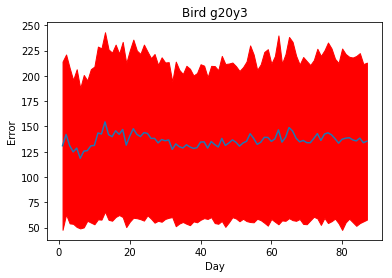

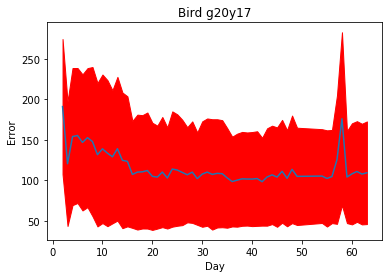

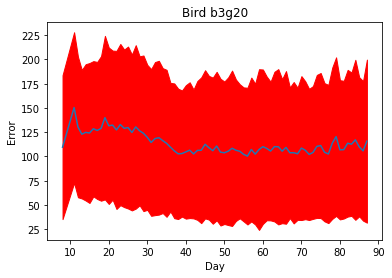

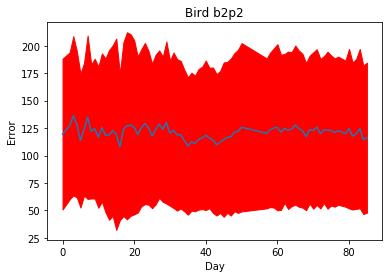

In [117]:
for tutor in tutor_folders:
    bird = tutor.replace('tutor_','')
    kmeans = tutor_clf[tutor_folders.index(tutor)]
    seq_folders = [i for i in os.listdir(data_path) if bird in i and not 'tutor' in i]
    days = []
    error_lists = []

    for folder in seq_folders:
        z = load_z(os.path.join(data_path,folder),max_num=2000)
        if len(z)<200:
            continue
        day = int(folder.split('_')[0].replace('day',''))
        days.append(day)
        z_t = kmeans.transform(z)
        dist = [i.min() for i in z_t]
        error_lists.append(dist)


    error_lists = [e for _,e in sorted(zip(days,error_lists))]
    days = sorted(days)

    error = np.array([np.mean(i) for i in error_lists])
    std = np.array([np.std(i) for i in error_lists])

    plt.figure()
    plt.plot(days,error)
    plt.fill_between(days, error-std, error+std,color='r')
    plt.ylabel('Error')
    plt.xlabel('Day')
    plt.title('Bird %s'%(bird))
plt.show()

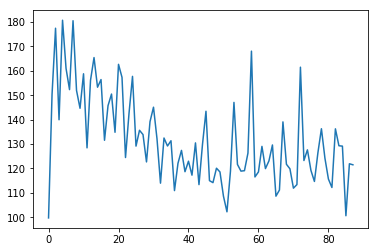

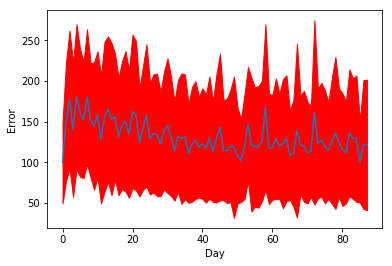

In [65]:
plt.figure()
plt.plot(range(len(days)),error)
plt.fill_between(range(len(days)), error-std, error+std,color='r')
plt.ylabel('Error')
plt.xlabel('Day')
plt.show()

#### Now look at the K-means error for each day

0 / 60
3 / 60
4 / 60
5 / 60
6 / 60
7 / 60
8 / 60
9 / 60
10 / 60
11 / 60
12 / 60
13 / 60
14 / 60
15 / 60
16 / 60
17 / 60
18 / 60
19 / 60
20 / 60
21 / 60
22 / 60
23 / 60
24 / 60
25 / 60
26 / 60
27 / 60
28 / 60
29 / 60
30 / 60
31 / 60
32 / 60
33 / 60
34 / 60
35 / 60
36 / 60
37 / 60
38 / 60
39 / 60
40 / 60
41 / 60
42 / 60
43 / 60
44 / 60
45 / 60
46 / 60
47 / 60
48 / 60
49 / 60
50 / 60
51 / 60
52 / 60
53 / 60
54 / 60
55 / 60
56 / 60
57 / 60
58 / 60
59 / 60


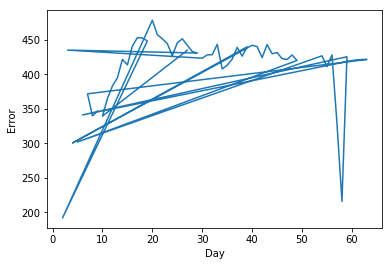

In [26]:
bird_name = 'g20y17'
seq_folders = [i for i in os.listdir(os.path.join(base_path,bird_name,'sequences')) if not '.npy' in i]
seq_folders = [i for i in seq_folders if not 'tutor' in i]
K = 100
data_path = os.path.join(base_path,bird_name,'sequences')
N = 20000
days = []
error = []
for i,folder in enumerate(seq_folders):
    z = load_z(os.path.join(data_path,folder))[:N]
    if len(z)<1000:
        continue
    days.append(int(folder.replace('day','')))
    z_t = KMeans(n_clusters=K,n_jobs=-1).fit_transform(z)
    mean_dist = np.mean([k.min() for k in z_t])
    error.append(mean_dist)
    print("%d / %d"%(i,len(seq_folders)))
    
plt.figure()
plt.plot(days,error)
plt.ylabel('Error')
plt.xlabel('Day')
plt.show()

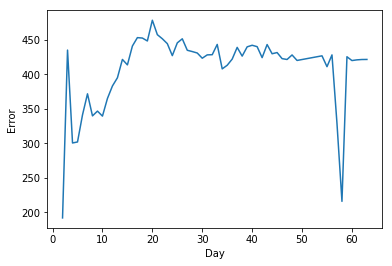

In [28]:
error = [x for _,x in sorted(zip(days,error))]
days.sort()
plt.figure()
plt.plot(days,error)
plt.ylabel('Error')
plt.xlabel('Day')
plt.show()

### 5. Explore transition matricies of a first order markov chain in latent space


In [67]:
def parse_line(line):
    return [int(i) for i in line.replace('\n','').split(',')[:-1]]

#base_path = "../mdgan_output/10-20 12-31/"
def entropy(p):
    return -np.sum([i*np.log(i) if i!=0 else 0 for i in p])

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

def calculate_transition_matrix(seq_file):
    vocab_size = 100
    lines = open(seq_file,'r').readlines()
    lines = [parse_line(i) for i in lines]
    T = np.zeros(shape=(vocab_size+2,vocab_size+2)) #+2 because start and end states
    F = np.zeros(102)
    for seq in lines:
        T[100,seq[0]] += 1
        for i in range(len(seq)-1):
            T[seq[i],seq[i+1]] += 1
        T[seq[-1],101] += 1
    return T
    
def calculate_entropy(seq_file):
    T=calculate_transition_matrix(seq_file)
    F = np.array([row.sum() for row in T])
    T = np.array([row/row.sum() for row in T])
    ent = [entropy(k) for k in T[:-1]]
    ent = [i if not np.isnan(i) else 0 for i in ent]
    avg,std = weighted_avg_and_std(ent,F[:-1])
    return avg,std,F[:-1].sum()
    #return np.dot(F[:-1],ent)/F[:-1].sum(),F[:-1].sum()

seq_path = join(base_path,'sequences_as_ints')
seq_files = os.listdir(seq_path)
tutor_files = [i for i in seq_files if 'tutor' in i]
seq_files = [i for i in seq_files if not 'tutor' in i]
day=[]
bird=[]
ent=[]
stds=[]
counts=[]
for i,file in enumerate(seq_files):
    day.append(int(file.split('_')[0].replace('day','')))
    bird.append(file.split('_')[1])
    ent_i, std_i,count_i = calculate_entropy(join(seq_path,file))
    ent.append(ent_i)
    stds.append(std_i)
    counts.append(count_i)

tutor_of = []
tutor_ent = []
tutor_stds = []
tutor_counts = []
for i,file in enumerate(tutor_files):
    tutor_of.append(file.split('_')[1])
    ent_i, std_i,count_i = calculate_entropy(join(seq_path,file))
    tutor_ent.append(ent_i)
    tutor_stds.append(std_i)
    tutor_counts.append(count_i)

/home/songbird/anaconda2/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


In [56]:
tutor_ent

[(2.0848639852199859, 0.60099942891956659),
 (2.398671194928879, 0.46159893388597928),
 (1.7478101457147683, 0.70928184488999235),
 (2.9689839306575823, 0.41746173373940054)]

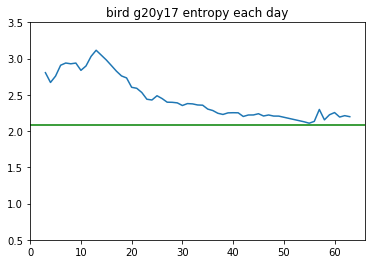

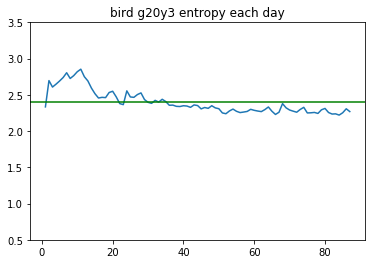

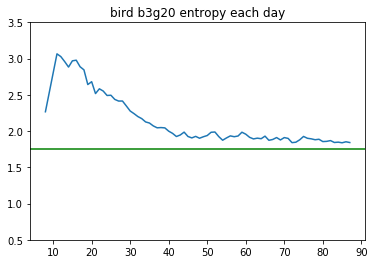

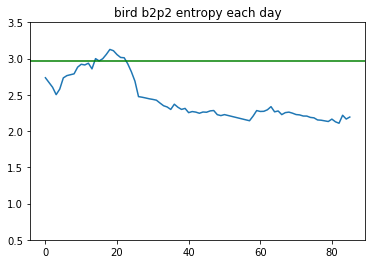

In [81]:
import pandas as pd
df = pd.DataFrame()
df['bird']=bird
df['day']=day
df['entropy']=ent
df['stds']=stds
df['counts']=counts

min_count = 1000
birds = list(set(bird))
for b in birds:
    bird_df = df[df.bird==b]
    bird_df = bird_df[bird_df.counts>min_count]
    bird_ent = bird_df.entropy.values
    bird_stds = bird_df.stds.values
    bird_counts = bird_df.counts.values
    bird_day = bird_df.day.values
    bird_day, bird_ent = (list(t) for t in zip(*sorted(zip(bird_day, bird_ent))))
    plt.figure()
    plt.plot(bird_day,bird_ent)
    #plt.fill_between(bird_day, bird_ent-bird_stds, bird_ent+bird_stds,color='r')
    plt.axhline(y=tutor_ent[tutor_of.index(b)], color='g', linestyle='-')
    plt.title("bird %s entropy each day"%(b))
    plt.ylim([0.5,3.5])
    plt.show()

#### Save transition mats

In [29]:
os.makedirs(join(base_path,"transition_mats"),exist_ok=True)
seq_files = seq_files+tutor_files
for i,file in enumerate(seq_files):
    T = calculate_transition_matrix(join(seq_path,file))
    np.save(join(base_path,"transition_mats",file.replace("seq.txt","tmat.npy")),T)

### 6. Save some quantized songs with a trained kmeans classifier

In [50]:
sample_path = '/media/songbird/Data/deep_learn_data/mdgan_input_16k_256pt_byday/'
directory = sample_path
dirs = [i for i in os.listdir(directory) if not len(os.listdir(join(directory,i)))==0]

In [51]:
import soundfile as sf
from utils import reconstruct_sample, encode_sample
def random_sample():
    rand_dir = dirs[np.random.randint(len(dirs))]
    sample_files = os.listdir(join(directory,rand_dir))
    return join(directory,rand_dir,sample_files[np.random.randint(len(sample_files))])

ImportError: dlopen: cannot load any more object with static TLS

In [46]:
os.makedirs(join(base_path,"tmp"),exist_ok=True)
n_samples = 20
for i in range(n_samples):
    sample=np.load(random_sample())
    sf.write("sample_input_%d.wav"%(i),lc.istft

'/media/songbird/Data1/deep_learn_data/mdgan_input_16k_256pt_byday/day35_b2p2/39060.npy'

In [47]:
sample=np.load(random_sample())

In [49]:
lc

NameError: name 'lc' is not defined